# Function to read the data from folder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.externals import joblib
%matplotlib inline

In [13]:
# def readnormalized(path, filename):
#     datafeatures=pd.read_csv(path+filename,header=None)
#     dfr=datafeatures[datafeatures.columns[0]]
#     df=datafeatures[datafeatures.columns[1:]]
#     dzs=df.apply(zscore)
#     #min_max_scaler = preprocessing.MinMaxScaler()
#     #scaled_array = min_max_scaler.fit_transform(df)
#     df_normalized = pd.DataFrame(dzs)
#     da=pd.concat([dfr, df_normalized],axis=1)
#     return da;

In [14]:
# path='C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/Msos/ACA-Code-master/Features/';
# filename='Effects5Features.csv'
# eff=readnormalized(path, filename)
# hum=readnormalized(path,'Human5Features.csv')
# mus=readnormalized(path,'Music5Features.csv')
# nat=readnormalized(path,'Nature5Features.csv')
# urb=readnormalized(path,'Urban5Features.csv')

In [15]:
# All=pd.concat([eff, hum,mus,nat,urb], axis=0)
# # eff.head()
# #type(All)

# Write the Xls file

In [16]:
# writer = pd.ExcelWriter(path+'allzscore.xlsx')
# All.to_excel(writer,'Sheet1')
# writer.save()

In [17]:
# TrainLabel=pd.read_csv(path+'Logsheet_Development.csv')
# b=All[0].tail()
#print TrainLabel 
#TrainLabel['File']

#  Reading csv data

In [18]:
path='C:/Users/Sultan/OneDrive - The University of Memphis/RESEARCH2017S/Msos/ACA-Code-master/Features/';
TrainLabel=pd.read_csv(path+'Logsheet_Development.csv')
#NewAll=pd.read_csv('all.csv')
# First need to add a 'FileName' in the 2nd column and delet the first column
NewAll=pd.read_csv(path+'allzscore.csv')
NewAll.columns = NewAll.columns.astype(str)

In [19]:
NewAll.head()

,FileName,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,03J.wav,-0.253767,-0.570028,1.569354,0.246321,-0.104473,0.468726,0.133977,-0.098509,-0.235818,...,-0.424627,-0.397054,-0.380810,-0.387917,-0.345363,-0.494849,-0.473409,-0.452014,-0.408440,-0.355506
1,07L.wav,0.493496,0.229284,-1.432952,0.294372,0.325935,0.335019,0.015511,-0.282397,-0.035257,...,-0.306916,-0.357002,-0.329687,-0.215241,-0.123965,-0.319397,-0.164818,-0.352013,-0.191533,-0.194256
2,0M8.wav,0.913320,0.054370,-0.793936,0.561064,-0.134824,0.682071,0.099388,0.642784,0.224363,...,0.449165,-0.374144,-0.364430,-0.278958,-0.124423,-0.254991,-0.199478,-0.269235,-0.364189,-0.401360
3,0UB.wav,0.225888,0.500648,0.073438,0.635488,0.563894,0.590488,0.200413,0.339793,0.361236,...,0.034770,-0.024222,-0.082471,0.145880,-0.001003,-0.103413,-0.021333,0.242127,0.183213,0.057923
4,0W9.wav,-0.921333,-0.974647,-0.346149,0.553977,1.130840,0.470933,-0.032249,-1.153277,1.930242,...,0.082553,0.260075,0.033727,0.007164,0.217574,0.045687,-0.023058,0.073570,-0.035216,0.150859


# Merger the same files name

In [121]:
merged = pd.merge(TrainLabel,NewAll,left_on='File',right_on='FileName')
M=merged

In [122]:
merged.head()

,Category,Event,File,FileName,1,2,3,4,5,6,...,19,20,21,22,23,24,25,26,27,28
0,Effects,Beep,TN7.wav,TN7.wav,0.450030,-0.657955,-0.472067,0.806378,-0.459013,-1.618040,...,0.122218,2.893903,0.092648,-0.039023,0.050159,1.894039,0.351836,0.455250,1.579959,0.189980
1,Effects,Beep,RTS.wav,RTS.wav,0.154962,0.139358,-0.480358,0.590554,0.081359,-0.366675,...,-0.291889,-0.263856,-0.320434,-0.101932,0.411335,-0.219554,-0.242461,-0.074286,0.202045,3.675072
2,Effects,Beep,NUO.wav,NUO.wav,0.289917,0.204257,-0.824198,-0.541661,-0.956361,1.102917,...,-0.586832,-0.546731,-0.546539,-0.566862,-0.604211,-0.688867,-0.666260,-0.641028,-0.718920,-0.700342
3,Effects,Beep,CPU.wav,CPU.wav,-0.426194,-0.796868,-0.975152,0.004693,1.128522,-0.321922,...,-0.617440,-0.367776,-0.186714,0.845387,2.035690,0.033353,-0.193004,0.833408,-0.329001,-0.437476
4,Effects,Beep,SB2.wav,SB2.wav,2.018386,1.276561,-1.464099,-1.085889,2.162222,0.215389,...,-0.428287,-0.513934,-0.553905,-0.592041,-0.638272,-0.631264,2.284499,-0.492994,-0.552408,-0.484110


In [123]:
# newwriter = pd.ExcelWriter('merged.xlsx')
# merged.to_excel(newwriter,'Sheet1')
# newwriter.save()

# Categorical name to discrete number

In [124]:
M['labelumn'] = pd.factorize(M['Category'], sort=True)[0] + 1
M.head()

,Category,Event,File,FileName,1,2,3,4,5,6,...,20,21,22,23,24,25,26,27,28,labelumn
0,Effects,Beep,TN7.wav,TN7.wav,0.450030,-0.657955,-0.472067,0.806378,-0.459013,-1.618040,...,2.893903,0.092648,-0.039023,0.050159,1.894039,0.351836,0.455250,1.579959,0.189980,1
1,Effects,Beep,RTS.wav,RTS.wav,0.154962,0.139358,-0.480358,0.590554,0.081359,-0.366675,...,-0.263856,-0.320434,-0.101932,0.411335,-0.219554,-0.242461,-0.074286,0.202045,3.675072,1
2,Effects,Beep,NUO.wav,NUO.wav,0.289917,0.204257,-0.824198,-0.541661,-0.956361,1.102917,...,-0.546731,-0.546539,-0.566862,-0.604211,-0.688867,-0.666260,-0.641028,-0.718920,-0.700342,1
3,Effects,Beep,CPU.wav,CPU.wav,-0.426194,-0.796868,-0.975152,0.004693,1.128522,-0.321922,...,-0.367776,-0.186714,0.845387,2.035690,0.033353,-0.193004,0.833408,-0.329001,-0.437476,1
4,Effects,Beep,SB2.wav,SB2.wav,2.018386,1.276561,-1.464099,-1.085889,2.162222,0.215389,...,-0.513934,-0.553905,-0.592041,-0.638272,-0.631264,2.284499,-0.492994,-0.552408,-0.484110,1


# Separate Features and class labels

In [125]:
Features=merged.iloc[:,4:32]
labels=merged.iloc[:,0]
#labels.head()

In [126]:
X_train, X_test, y_train, y_test = train_test_split(Features,labels, test_size=.20, random_state=40) 
np.unique(y_test,return_counts=True)

(array(['Effects', 'Human', 'Music', 'Nature', 'Urban'], dtype=object),
 array([62, 57, 56, 77, 48], dtype=int64))

In [128]:
type(y_test)

pandas.core.series.Series

In [27]:
y_test.head()

1044    Nature
1150    Nature
771      Music
1171    Nature
621      Music
Name: Category, dtype: object

In [28]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [29]:
# from sklearn.tree import DecisionTreeClassifier
# dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
# dtree_predictions = dtree_model.predict(X_test)
# #accuracy=dtree_predictions.score(X_test, y_test)

# Training a DescisionTreeClassifier [link](https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/)

# Decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
dtree_model=clf.fit(X_train,y_train)
dtree_predictions=dtree_model.predict(X_test)
#cross_val_score(clf, Features, labels, cv=10)
score=cross_val_score(clf, X_train, y_train, cv=5)
# Mean score
score.mean()

0.00082644628099173552

# Confusion matrix and accuracy of DT

In [59]:
# cm = confusion_matrix(y_test, dtree_predictions)
# cm

In [60]:
# acctre=accuracy_score(y_test, dtree_predictions)
# print("The accucracy of DT is %2f:" % acctre)

# SVM classifier

In [61]:
clf = svm.SVC(kernel='linear', C=5)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([ 0.14049587,  0.15289256,  0.13692946,  0.14705882,  0.12658228])

# Average accuracy

In [62]:
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

Accuracy:0.141 (+/-0.018)


# ShuffleSplit (Other Cross-validation)

In [63]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cr=cross_val_score(clf, Features, labels, cv=cv)
cr

array([ 0.11111111,  0.11555556,  0.12666667,  0.11777778,  0.12      ])

# Average Accuracy for shuffle split

In [64]:
print("Accuracy:%0.3f (+/-%0.3f)" %(cr.mean(), cr.std()*2))

Accuracy:0.118 (+/-0.010)


# Gridserach CV

In [65]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,100],'gamma':[0.01,.002]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(Features, labels)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'C': [1, 10, 100], 'gamma': [0.01, 0.002]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

# Find the score

In [66]:
clf.cv_results_['mean_test_score']

array([ 0.11733333,  0.12222222,  0.17422222,  0.15822222,  0.11733333,
        0.17511111,  0.17911111,  0.17822222,  0.11733333,  0.07244444,
        0.14444444,  0.18266667,  0.11733333,  0.11911111,  0.17822222,
        0.14222222,  0.11777778,  0.02177778,  0.08      ,  0.19066667,
        0.11777778,  0.08311111,  0.17466667,  0.13911111])

# Find the best parameters

In [71]:
clf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
print acc

0.196666666667


In [73]:
#sorted(clf.cv_results_.keys())

In [74]:
#clf.cv_results_

# Confusion Matrix

In [78]:
# pred=clf.best_estimator_.predict(X_test)
# conf_mat=confusion_matrix(y_test,pred)
# #conf_mat
# # conf_mat=confusion_matrix(y_test,pred)
# conf_mat

In [86]:
pred=clf.best_estimator_.predict(X_test)
pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predict Effects', 'Predict Human', 'Predict Music', 'Predict Nature', 'Predict Urban'],
    index=[' True Effects', 'True Human', ' True Music', ' True Nature', 'True Urban'])

,Predict Effects,Predict Human,Predict Music,Predict Nature,Predict Urban
True Effects,25,35,0,0,2
True Human,23,31,0,0,3
True Music,27,27,0,0,2
True Nature,33,40,0,0,4
True Urban,20,25,0,0,3


In [87]:
df=pd.DataFrame(pred)
np.unique(df,return_counts=True)

(array(['Effects', 'Human', 'Urban'], dtype=object),
 array([128, 158,  14], dtype=int64))

In [88]:
np.unique(y_test,return_counts=True)

(array(['Effects', 'Human', 'Music', 'Nature', 'Urban'], dtype=object),
 array([62, 57, 56, 77, 48], dtype=int64))

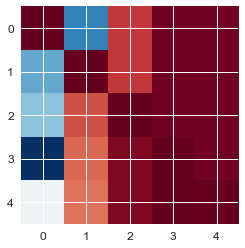

In [91]:
# cmap=plt.cm.RdBu
# plt.imshow(cm, interpolation='nearest', cmap=cmap)

# Gaussian Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [94]:
y_pred=gnb.fit(X_train,y_train).predict(X_test)
#y_pred.results

In [95]:
print("Number of mislabeled points out of a total %d points : %d"
      % (y_test.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 300 points : 233


In [96]:
acc=(1-(y_test!= y_pred).sum()/300.0)*100
print("Accuracy %f" %acc)

Accuracy 22.333333


In [97]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[ 5,  1,  2, 52,  2],
       [11,  0,  0, 43,  3],
       [10,  1,  0, 43,  2],
       [ 9,  1,  4, 60,  3],
       [ 7,  1,  4, 34,  2]])

In [98]:
# (y_test!=y_pred).sum())

# Random Forest [link](https://www.codementor.io/agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu)

In [99]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
1000,-0.092606,-0.803322,0.436299,0.558966,-0.364590,-2.121087,-1.656618,-1.603110,-1.949577,-0.753489,...,0.029105,-0.042571,-0.000995,0.592786,0.401495,0.236442,0.279973,0.449971,0.626767,0.386103
758,-0.441928,-0.809542,1.946002,-0.386118,-1.037969,0.103566,0.345240,-0.824837,0.013647,0.193033,...,-0.587960,-0.580835,-0.558383,-0.560669,-0.521949,-0.606740,-0.516179,-0.418984,-0.576637,-0.578329
275,-0.684670,-0.954852,1.455349,-0.610224,-2.291685,0.241057,1.173868,-0.254626,-1.629353,0.699847,...,-0.603643,-0.574592,-0.399914,-0.475681,-0.460884,-0.139903,-0.579840,-0.051232,-0.337747,-0.632993
1374,0.640522,1.791030,-0.619235,0.223157,-0.904936,-1.299869,1.784624,-0.691152,-1.013370,0.931841,...,0.143895,-0.194303,2.226591,0.033853,2.634816,0.112710,1.025806,-0.119149,0.476427,0.290783
169,0.804598,1.123730,1.037069,0.253851,-0.847445,-0.523732,0.138399,-0.318412,0.646835,-0.279924,...,0.079732,-0.277806,-0.291740,-0.287884,-0.311533,-0.398923,-0.363308,-0.332832,-0.138297,-0.057614


# pd to numpy

In [100]:
#Creating the dependent variable class
factor = pd.factorize(M['Category'])
M.Category = factor[0]
definitions = factor[1]
print(M.Category.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64
Index([u'Effects', u'Human', u'Music', u'Nature', u'Urban'], dtype='object')


In [102]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [132]:
y_pred = classifier.predict(X_test)
y1=y_test
#print y1

In [134]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

Predicted Species  Effects  Human  Music  Nature  Urban
Actual Species                                         
Effects                  0     18     15      16     13
Human                   15      0     14      15     13
Music                   19     11      0      14     12
Nature                  24     24     18       0     11
Urban                    7     11     18      12      0


In [138]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))

Predicted Species  Effects  Human  Music  Nature  Urban
Actual Species                                         
Effects                  0     18     15      16     13
Human                   15      0     14      15     13
Music                   19     11      0      14     12
Nature                  24     24     18       0     11
Urban                    7     11     18      12      0


In [139]:
classifier.feature_importances_

array([ 0.04,  0.04,  0.04,  0.03,  0.03,  0.03,  0.04,  0.04,  0.04,
        0.04,  0.04,  0.04,  0.05,  0.04,  0.03,  0.04,  0.03,  0.03,
        0.03,  0.03,  0.03,  0.04,  0.03,  0.03,  0.03,  0.03,  0.03,  0.03])

In [140]:
# # Predicting the Test set results
# y_pred = classifier.predict(X_test)
# #Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
# reversefactor = dict(zip(range(5),definitions))
# y_test = np.vectorize(reversefactor.get)(y_test)
# y_pred = np.vectorize(reversefactor.get)(y_pred)
# # Making the Confusion Matrix
# print(pd.crosstab(y_test, y_pred, rownames=['Actual Species'], colnames=['Predicted Species']))